In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from helper import *

In [24]:
def B_n(t, X): #cumulative function, X is the array with all the random variables
    return len(X[X<t])/len(X)

In [25]:
def b_n(t,X):
    return np.sqrt(len(X))*(B_n(t, X)-t)

In [32]:
n=1000

np.random.seed(9001) #setting seed for reproducibility
X=np.random.uniform(size=n)
Y=np.linspace(1,n,n)/(n+1)
C=np.zeros((n,n))#cost matrix, C_ij is the distance between X_i and Y_j

for i in range(n):
    for j in range(n):
        C[i,j]=np.abs(X[i]-Y[j])**2#we're in dimension 1, okay, in higher dimension will need the norm
            
a=np.ones(n)/n
b=np.ones(n)/n
P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)
    
# defining the interpolating function
f=np.zeros(n+2) 

sigma=np.zeros(n)
X_p=np.zeros(n)

for i in range(n):
    index=np.argwhere(P_test[i,:]>0)
    X_p[index[0,0]]=X[i]


for i in range(0,n):
    f[i+1]=Y[i]-X_p[i]

f=np.sqrt(n)*f #normalizing to compare more easily

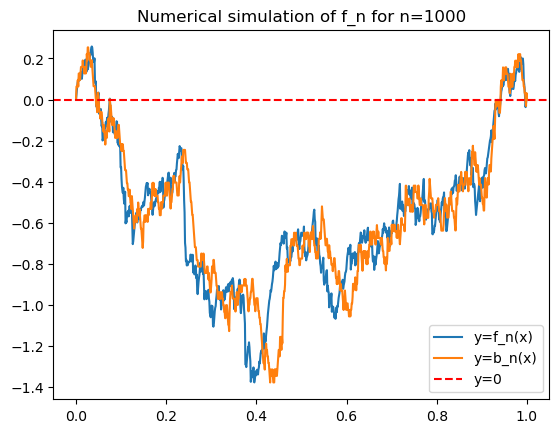

In [33]:
z=np.linspace(0,1,n+2) #list of increments
list_b=[b_n(z_index, X) for z_index in z]
plt.plot(z,f, label="y=f_n(x)")  #the original command without pre-running
plt.plot(z, list_b, label="y=b_n(x)")
plt.axhline(y=0, color='r', linestyle='--', label="y=0")
plt.title("Numerical simulation of f_n for n=%s" % n)
plt.legend(loc='lower right')